<a href="https://colab.research.google.com/github/harsh204016/fastai-nlp-tutorials/blob/master/topic_modeling_with_svd_and_nmf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [4]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [5]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [6]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [7]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [0]:
num_topics, num_top_words = 6, 8

In [9]:
from sklearn.feature_extraction import stop_words

sorted(list(stop_words.ENGLISH_STOP_WORDS))[-20:]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


['which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves']

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk import stem

In [0]:
wnl =  stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [0]:

word_list = ['feet', 'foot', 'foots', 'footing']

In [14]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [15]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

In [16]:
l1= ['fly','flies','flying']
print([wnl.lemmatize(x) for x in l1])
print([porter.stem(x) for x in l1])

['fly', 'fly', 'flying']
['fli', 'fli', 'fli']


In [17]:
l2=['organize','organizes','organizing']
print([wnl.lemmatize(x) for x in l2])
print([porter.stem(x) for x in l2])

['organize', 'organizes', 'organizing']
['organ', 'organ', 'organ']


In [18]:
l3=['universe','university']
print([wnl.lemmatize(x) for x in l3])
print([porter.stem(x) for x in l3])

['universe', 'university']
['univers', 'univers']


In [0]:
import spacy

In [0]:
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
lookups = Lookups()
lookups.add_table("lemma_rules", {"noun": [["s", ""]]})

le = Lemmatizer(lookups)


In [21]:
[le.lookup(x) for x in word_list]

['feet', 'foot', 'foots', 'footing']

In [0]:
nlp =  spacy.load('en_core_web_sm')

In [23]:
sorted(list(nlp.Defaults.stop_words))[-20:]

['without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 '‘d',
 '‘ll',
 '‘m',
 '‘re',
 '‘s',
 '‘ve',
 '’d',
 '’ll',
 '’m',
 '’re',
 '’s',
 '’ve']

In [0]:
l= set(stop_words.ENGLISH_STOP_WORDS) - set(nlp.Defaults.stop_words)

In [25]:
len(l)

27

In [26]:
l

{'amoungst',
 'bill',
 'cant',
 'co',
 'con',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'eg',
 'etc',
 'fill',
 'find',
 'fire',
 'found',
 'hasnt',
 'ie',
 'inc',
 'interest',
 'ltd',
 'mill',
 'sincere',
 'system',
 'thick',
 'thin',
 'un'}

In [27]:
l2= set(nlp.Defaults.stop_words)-set(stop_words.ENGLISH_STOP_WORDS) 
len(l2)

35

In [28]:
l2

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'ca',
 'did',
 'does',
 'doing',
 'just',
 'make',
 "n't",
 'n‘t',
 'n’t',
 'quite',
 'really',
 'regarding',
 'say',
 'unless',
 'used',
 'using',
 'various',
 '‘d',
 '‘ll',
 '‘m',
 '‘re',
 '‘s',
 '‘ve',
 '’d',
 '’ll',
 '’m',
 '’re',
 '’s',
 '’ve'}

In [29]:
nlp.Defaults.stop_words-stop_words.ENGLISH_STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'ca',
 'did',
 'does',
 'doing',
 'just',
 'make',
 "n't",
 'n‘t',
 'n’t',
 'quite',
 'really',
 'regarding',
 'say',
 'unless',
 'used',
 'using',
 'various',
 '‘d',
 '‘ll',
 '‘m',
 '‘re',
 '‘s',
 '‘ve',
 '’d',
 '’ll',
 '’m',
 '’re',
 '’s',
 '’ve'}

In [0]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [0]:
import nltk

In [0]:
vector = CountVectorizer(stop_words='english')

In [33]:
vectors = vector.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2034, 26576)

In [34]:
print(len(newsgroups_train.data),vectors.shape)

2034 (2034, 26576)


In [0]:
vocab =  np.array(vector.get_feature_names())

In [36]:
vocab.shape

(26576,)

In [37]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

SVD  Singular Value Decomposition

In [38]:
%time U , s , Vh =linalg.svd(vectors , full_matrices=False)

CPU times: user 1min 11s, sys: 3.54 s, total: 1min 14s
Wall time: 38.5 s


In [39]:
print(U.shape,s.shape,Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [40]:
s[:4]

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [41]:
np.diag(s[:4])

array([[433.92698542,   0.        ,   0.        ,   0.        ],
       [  0.        , 291.51012741,   0.        ,   0.        ],
       [  0.        ,   0.        , 240.71137677,   0.        ],
       [  0.        ,   0.        ,   0.        , 220.00048043]])

How to confirm U , s , Vh are the decomposition of the vectors

In [42]:
recons_vec = U @ np.diag(s) @ Vh

np.allclose(recons_vec, vectors)

#alternate way of doing it
#np.linalg.norm(recons_vec-vectors)

True

In [43]:
U[:2]

array([[-0.00477991,  0.00271988, -0.00121236, ..., -0.        ,
        -0.        , -0.        ],
       [-0.0002213 , -0.00017499, -0.00107815, ...,  0.        ,
        -0.        , -0.        ]])

In [44]:
Vh[:2]

array([[-0.00940972, -0.0114532 , -0.00002169, ..., -0.00000572,
        -0.00001144, -0.00109243],
       [-0.00356688, -0.01769167, -0.00003045, ..., -0.00000773,
        -0.00001546, -0.0018549 ]])

How to check the matrices are normal

In [45]:
print(np.linalg.det(np.abs(np.dot(U.T,U))))

1.0000000000000555


In [46]:
np.allclose( U.T @ U , np.eye(U.shape[0])) 
np.allclose( Vh @ Vh.T , np.eye(Vh.shape[0])) 

True

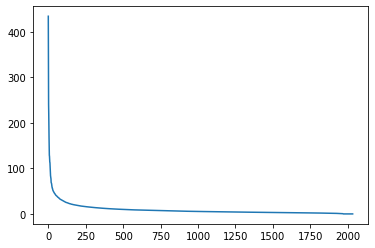

In [47]:
plt.plot(s)

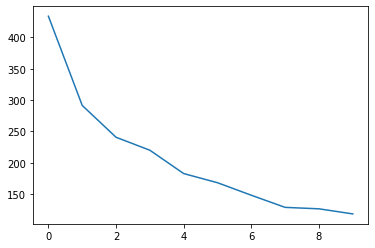

In [48]:
plt.plot(s[:10])

In [0]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [50]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

NMF non-negative Matrix Factorization

![alt text](https://github.com/fastai/course-nlp/raw/aabfeddf61fea29b18c72f841d057b56a216b7eb/images/nmf_doc.png)

In [0]:
m,n = vectors.shape

In [0]:
d=5

In [0]:
clf = decomposition.NMF(n_components=d,random_state=1)

w1 = clf.fit_transform(vectors)
h1 = clf.components_

In [57]:
show_topics(h1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

TF - IDF topic frequency inverse doc frequency

In [0]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

In [0]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [61]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

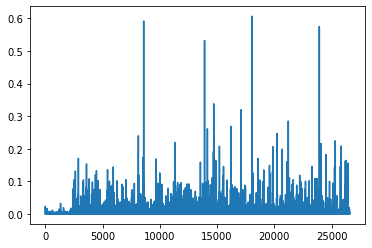

In [63]:
plt.plot(clf.components_[0])

In [64]:
clf.reconstruction_err_

43.712926057952785

truncated SVD

In [65]:
%time u , S, v =np.linalg.svd(vectors,full_matrices=False)

CPU times: user 1min 12s, sys: 3.34 s, total: 1min 15s
Wall time: 38.9 s


In [67]:
!pip install fbpca

  Created wheel for fbpca: filename=fbpca-1.0-cp36-none-any.whl size=11376 sha256=9b25a2f7c4d5c7348237ea30976c043cc16e9a81d78a471c3ed3a34ad8ae9e63
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
Successfully built fbpca


In [0]:
from sklearn import decomposition
import fbpca

In [70]:
%time u , s, v = decomposition.randomized_svd(vectors,10)

CPU times: user 12.5 s, sys: 1.58 s, total: 14 s
Wall time: 10.1 s


In [71]:
%time u , s, v = fbpca.pca(vectors,10)

CPU times: user 2.31 s, sys: 479 ms, total: 2.79 s
Wall time: 1.5 s
